# Hands-on Practice for Module 1: Exploratory Data Analysis

### 0. Importing necessary packages

In [1]:
# data loading and computing functionality
import pandas as pd
import numpy as np
import scipy as sp

# datasets in sklearn package
from sklearn.datasets import load_digits

# visualization packages
import seaborn as sns
import matplotlib.pyplot as plt

#PCA, SVD, LDA
from sklearn.decomposition import PCA
from scipy.linalg import svd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


### 1. Loading data, determining samples, attributes, and types of attributes

<span style="color:red">**Questions:** </span> 
- Where is the data obtained from? Anonymous Patients
- What does the data capture?
- How many data points are there? 
- What is the dimensionality? 
- What type of attributes are present in the dataset? 

Introducing **pandas** library that provides data structures and data analysis tools

In [2]:
import pandas as pd
iris_df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/iris.csv')

In [3]:
type(iris_df)

pandas.core.frame.DataFrame

In [4]:
iris_df.shape

(150, 5)

In [5]:
iris_df.dtypes

SepalLength    float64
SepalWidth     float64
PetalLength    float64
PetalWidth     float64
Name            object
dtype: object

In [6]:
iris_df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
iris_df.tail()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [8]:
iris_df.to_csv('myData.csv', sep=',')


### 2. Generating summary statistics

<span style="color:red">**Questions:** </span> 
- What are range of values these numeric attributes take? 
- What different values do categorical attributes take? 
- What are is mean values for each of the attributes?
- What are is variance for each of the attributes?
- How is the data distributed for each of these attributes?

In [3]:
iris_df.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
iris_df.describe(include='all')

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [11]:
from pandas.api.types import is_numeric_dtype

for col in iris_df.columns:
    if is_numeric_dtype(iris_df[col]):
        print('%s:' % (col))
        print('\t Mean = %.2f' % iris_df[col].mean())
        print('\t Standard deviation = %.2f' % iris_df[col].std())
        print('\t Variance = %.2f' % iris_df[col].var())
        print('\t Minimum = %.2f' % iris_df[col].min())
        print('\t Maximum = %.2f' % iris_df[col].max())
        

SepalLength:
	 Mean = 5.84
	 Standard deviation = 0.83
	 Variance = 0.69
	 Minimum = 4.30
	 Maximum = 7.90
SepalWidth:
	 Mean = 3.05
	 Standard deviation = 0.43
	 Variance = 0.19
	 Minimum = 2.00
	 Maximum = 4.40
PetalLength:
	 Mean = 3.76
	 Standard deviation = 1.76
	 Variance = 3.11
	 Minimum = 1.00
	 Maximum = 6.90
PetalWidth:
	 Mean = 1.20
	 Standard deviation = 0.76
	 Variance = 0.58
	 Minimum = 0.10
	 Maximum = 2.50


In [12]:
iris_df['Name'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Name, dtype: int64

Introducing **Seaborn**, a statistical data visualization library

Visualizing a histogram for a numerical attribute using distplot function in seaborn

/usr/local/python/2.7-conda5.2/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


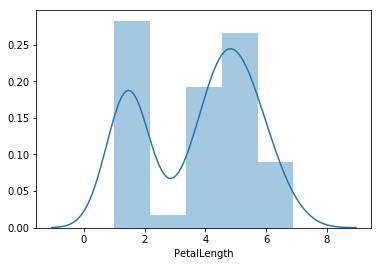

In [5]:
sns.distplot(iris_df['PetalLength']);

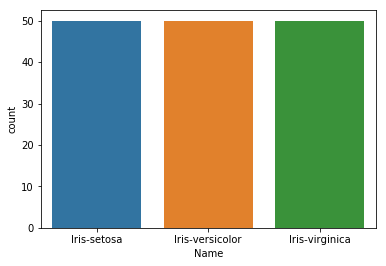

In [14]:
sns.countplot(iris_df['Name']);

Visualizing a histogram for a categorical attribute

### 3. High-dimensional spaces

<span style="color:red">**Questions:** </span> 
- Compare the distance between points in 2D with distance of points in high-dimensional spaces?

Randomly creating 10K points in $R^d$

In [15]:
points_2d = np.random.rand(10000,2);
points_10d = np.random.rand(10000,10);
points_50d = np.random.rand(10000,50);
points_100d = np.random.rand(10000,100);
points_1000d = np.random.rand(10000,1000);

points_2d.shape
points_1000d.shape


(10000, 1000)

Computing pairwise distances between random points

In [16]:
dist_2d = sp.spatial.distance.pdist(points_2d);
dist_10d= sp.spatial.distance.pdist(points_10d);
dist_50d= sp.spatial.distance.pdist(points_50d);
dist_100d = sp.spatial.distance.pdist(points_100d);
dist_1000d = sp.spatial.distance.pdist(points_1000d);

Plotting the distribution of distances in each $R^d$

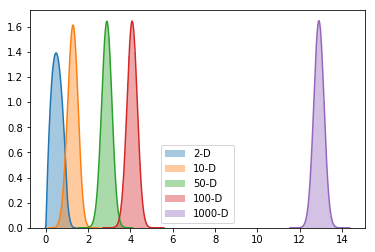

In [17]:
sns.distplot(dist_2d,label='2-D');
sns.distplot(dist_10d,label='10-D');
sns.distplot(dist_50d,label='50-D');
sns.distplot(dist_100d,label='100-D');
ax = sns.distplot(dist_1000d,label='1000-D');
ax.legend()

### 4. Understanding the (in)dependencies among attributes using Covariance matrix

<span style="color:red">**Questions:** </span> 
- What is the covariance matrix? 
- Which pairs of attributes co-vary?
- Which pairs of attributes have low covariance?
- Which pairs of attributes are highly correlated? 
- Which pairs of attributes are uncorrelated? 
- What information do you gain from a correlation matrix, but not from a covariance matrix?

In [18]:
data = iris_df.values[:,0:4]
data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3.0, 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5.0, 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5.0, 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3.0, 1.4, 0.1],
       [4.3, 3.0, 1.1, 0.1],
       [5.8, 4.0, 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1.0, 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5.0, 3.0, 1.6, 0.2],
       [5.0, 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [19]:
def mycov(data, col_a, col_b):
    mu = np.mean(data, axis=0) #compute mean
    sum = 0;
    for i in range(0, len(data)):
        sum += ((data[i,col_a] - mu[col_a]) * (data[i,col_b] - mu[col_b]))

    return sum/(len(data)-1)

In [20]:
[mycov(data,0,0), mycov(data,0,1), mycov(data,0,2), mycov(data,0,3)]

[0.6856935123042505,
 -0.03926845637583892,
 1.2736823266219242,
 0.5169038031319912]

In [21]:
print('Covariance:')
iris_df.cov()

Covariance:


,SepalLength,SepalWidth,PetalLength,PetalWidth
SepalLength,0.685694,-0.039268,1.273682,0.516904
SepalWidth,-0.039268,0.188004,-0.321713,-0.117981
PetalLength,1.273682,-0.321713,3.113179,1.296387
PetalWidth,0.516904,-0.117981,1.296387,0.582414


In [22]:
print('Correlation:')
iris_df.corr()

Correlation:


,SepalLength,SepalWidth,PetalLength,PetalWidth
SepalLength,1.000000,-0.109369,0.871754,0.817954
SepalWidth,-0.109369,1.000000,-0.420516,-0.356544
PetalLength,0.871754,-0.420516,1.000000,0.962757
PetalWidth,0.817954,-0.356544,0.962757,1.000000


### 4. Dimensionality Reduction: Feature Selection

**Assumption:** Assume that your goal is to cluster the data to identify the species 'Name'. Clustering algorithm takes as input data points and attributes. It groups points that are similar to each other into a separate cluster. It puts points that are dissimilar in different cluster. Note that the 'Name' attribute will be hidden from the clustering algorithm.

<span style="color:red">**Questions:** </span> 
- If you are allowed to select only one (out of the four) feature, which feature would be highly useful for the clustering task. Provide a reason.
- If you are allowed to select only two (out of the four) feature, which feature would be highly useful for the clustering task. Provide a reason.
- Note that in real-world problems ground-truth will not be available to select the features, how do you approach the feature selection problem in that case?

*pairplot* function in seaborn library simultaneously generates histograms for individual attributes and pairwise scatter plots.

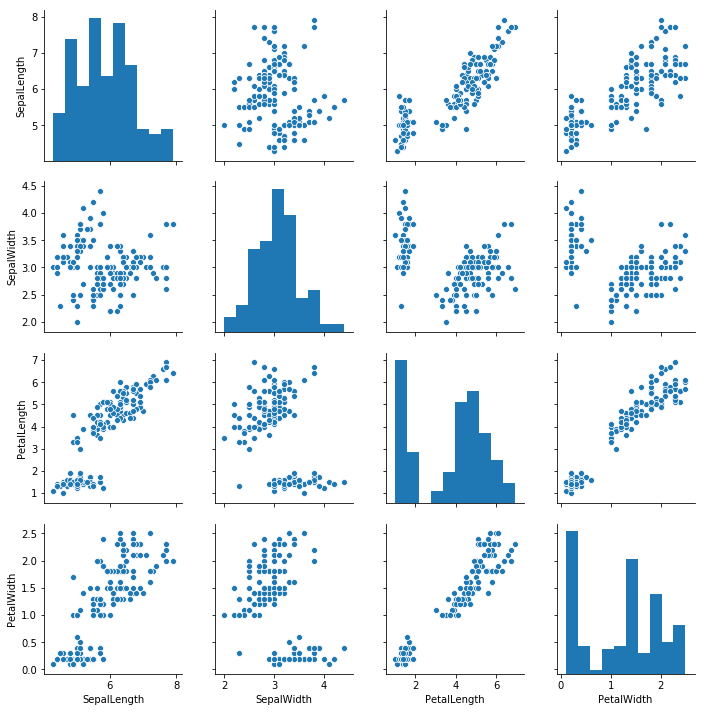

In [23]:
sns.pairplot(iris_df)

Pair plots allows you to do separate histograms and color scatter plots based on a categorical attribute.

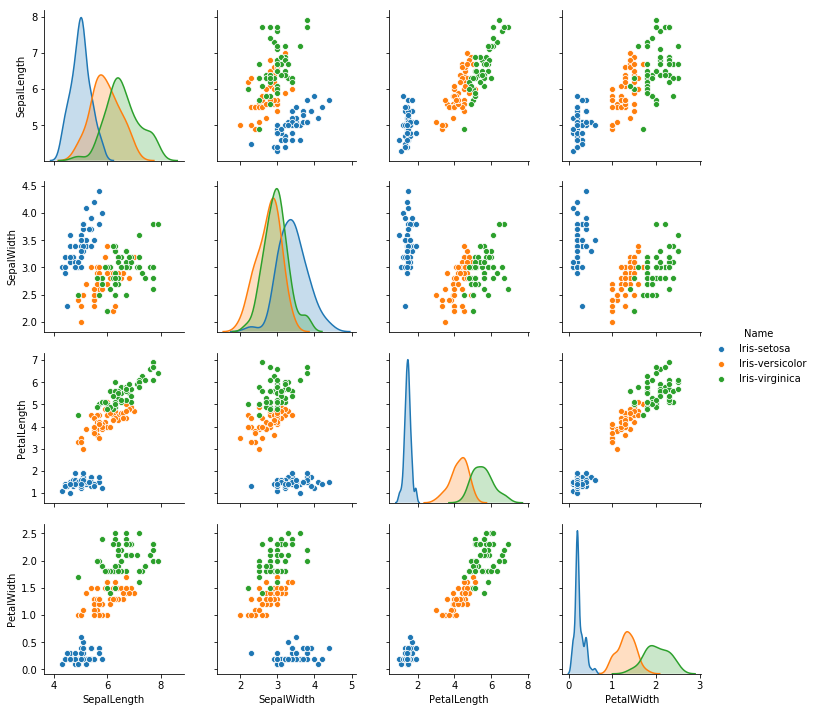

In [24]:
import seaborn as sns
sns.pairplot(iris_df, hue="Name")

### 5. Dimensionality Reduction: PCA

Steps involved in PCA
1. Input data: set of points in $R^d$
2. Compute covariance matrix $\Sigma$ (a $d \times d$ matrix)
3. Compute Eigenvectors of $\Sigma$
4. Select $r$ Eigenvectors (based on a parameter or based on variance explained) corresponding to the highest eigenvalues
5. Project data on to the new $r$ dimensional space

Step 1: Load data

In [25]:
digits = load_digits()
digits.data.shape

(1797, 64)

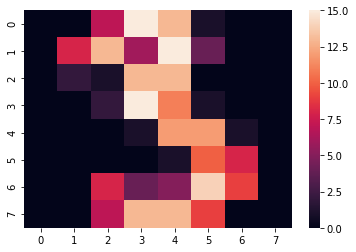

In [26]:
sns.heatmap(np.reshape(digits.data[3,:],[8,8]))

Step 2: Compute covariance matrix $\Sigma$ (a $d \times d$ matrix)

In [27]:
digits_cov = np.empty([np.size(digits.data,1), np.size(digits.data,1)]);
for i in range (0, np.size(digits.data,1)):
    for j in range (i, np.size(digits.data,1)):
        digits_cov[i,j] = mycov(digits.data,i,j);
        digits_cov[j,i] = digits_cov[i,j];

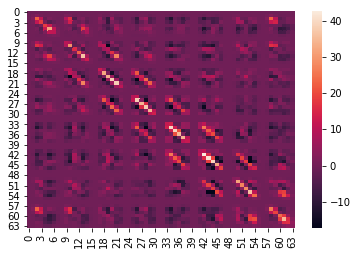

In [28]:
sns.heatmap(digits_cov)

Step 3: Compute Eigenvectors of $\Sigma$

In [36]:
w,v = np.linalg.eig(digits_cov)

In [37]:
w

array([1.79006930e+02, 1.63717747e+02, 1.41788439e+02, 1.01100375e+02,
       6.95131656e+01, 5.91085249e+01, 5.18845391e+01, 4.40151067e+01,
       4.03109953e+01, 3.70117984e+01, 2.85190412e+01, 2.73211698e+01,
       2.19014881e+01, 2.13243565e+01, 1.76367222e+01, 1.69468639e+01,
       1.58513899e+01, 1.50044602e+01, 1.22344732e+01, 1.08868593e+01,
       1.06935663e+01, 9.58259779e+00, 9.22640260e+00, 8.69036872e+00,
       8.36561190e+00, 7.16577961e+00, 6.91973881e+00, 6.19295508e+00,
       5.88499123e+00, 5.15586690e+00, 4.49129656e+00, 4.24687799e+00,
       4.04743883e+00, 3.94340334e+00, 3.70647245e+00, 3.53165306e+00,
       3.08457409e+00, 2.73780002e+00, 2.67210896e+00, 2.54170563e+00,
       2.28298744e+00, 1.90724229e+00, 1.81716569e+00, 1.68996439e+00,
       1.40197220e+00, 1.29221888e+00, 1.15893419e+00, 9.31220008e-01,
       6.69850594e-01, 4.86065217e-01, 2.52350432e-01, 9.91527944e-02,
       6.31307848e-02, 6.07377581e-02, 3.96662297e-02, 1.49505636e-02,
      

In [38]:
np.shape(v)

(64, 64)

In [39]:
np.matmul(v,  np.transpose(v))

array([[ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  1.00000000e+00,  7.50029130e-16, ...,
        -3.70266621e-16,  3.49763506e-15, -5.05616000e-15],
       [ 0.00000000e+00,  7.50029130e-16,  1.00000000e+00, ...,
        -5.99586784e-15,  3.70508844e-15,  5.89051975e-15],
       ...,
       [ 0.00000000e+00, -3.70266621e-16, -5.99586784e-15, ...,
         1.00000000e+00, -4.11493649e-16, -9.40544892e-15],
       [ 0.00000000e+00,  3.49763506e-15,  3.70508844e-15, ...,
        -4.11493649e-16,  1.00000000e+00,  5.87643883e-15],
       [ 0.00000000e+00, -5.05616000e-15,  5.89051975e-15, ...,
        -9.40544892e-15,  5.87643883e-15,  1.00000000e+00]])

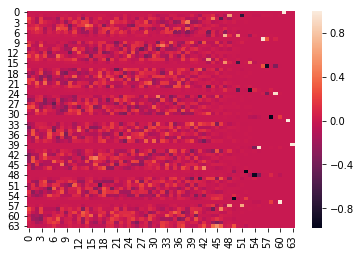

In [40]:
sns.heatmap(v)

Step 4: Select $r$ Eigenvectors (based on a parameter or based on variance explained) corresponding to the highest eigenvalues

Text(0,0.5,'variance')

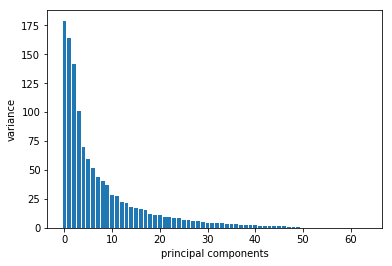

In [41]:
plt.bar(np.arange(64),w)
plt.xlabel('principal components')
plt.ylabel('variance')

In [42]:
np.cumsum(w)/np.sum(w)

array([0.14890594, 0.28509365, 0.40303959, 0.48713938, 0.54496353,
       0.59413263, 0.6372925 , 0.67390623, 0.70743871, 0.73822677,
       0.76195018, 0.78467714, 0.80289578, 0.82063433, 0.83530534,
       0.84940249, 0.86258838, 0.87506976, 0.88524694, 0.89430312,
       0.9031985 , 0.91116973, 0.91884467, 0.9260737 , 0.93303259,
       0.9389934 , 0.94474955, 0.94990113, 0.95479652, 0.9590854 ,
       0.96282146, 0.96635421, 0.96972105, 0.97300135, 0.97608455,
       0.97902234, 0.98158823, 0.98386565, 0.98608843, 0.98820273,
       0.99010182, 0.99168835, 0.99319995, 0.99460574, 0.99577196,
       0.99684689, 0.99781094, 0.99858557, 0.99914278, 0.99954711,
       0.99975703, 0.99983951, 0.99989203, 0.99994255, 0.99997555,
       0.99998798, 0.99999503, 0.99999804, 0.99999911, 0.99999966,
       1.        , 1.        , 1.        , 1.        ])

Text(0,0.5,'variance covered')

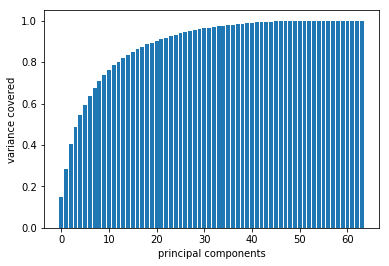

In [43]:
plt.bar(np.arange(64),np.cumsum(w)/np.sum(w))
plt.xlabel('principal components')
plt.ylabel('variance covered')

Step 5: Project data on to the new $r$ dimensional space

In [44]:
projected_data = np.matmul(digits.data,v[:,0:2])

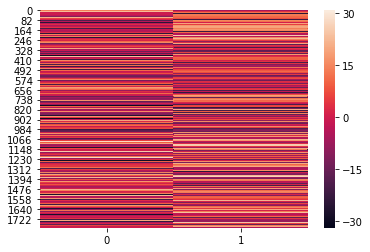

In [45]:
sns.heatmap(projected_data)

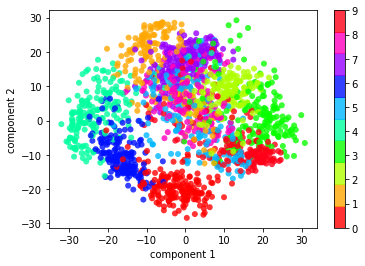

In [46]:
plt.scatter(projected_data[:, 0], projected_data[:, 1],
            c=digits.target, edgecolor='none', alpha=0.8,
            cmap=plt.cm.get_cmap('hsv', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

A much simpler way to do PCA using library function from sklearn:

In [47]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)    

(1797, 64)
(1797, 2)


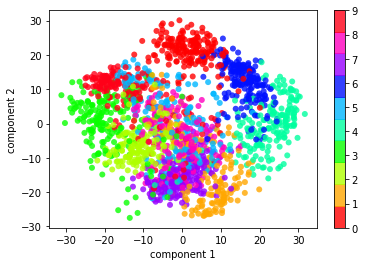

In [48]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.8,
            cmap=plt.cm.get_cmap('hsv', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

### 6. Singular Value Decomposition

In [49]:
A = np.array([
    [1, 1, 1, 0, 0],
    [3, 3, 3, 0, 0],
    [4, 4, 4, 0, 0],
    [5, 5, 5, 0, 0],
    [0, 2, 0, 4, 4],
    [0, 0, 0, 5, 5],
    [0, 1, 0, 2, 2]])

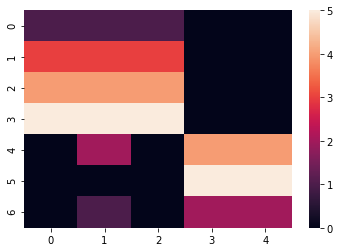

In [50]:
sns.heatmap(A)

In [51]:
U, S, V = svd(A, full_matrices = False)

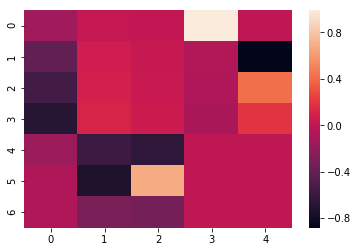

In [52]:
sns.heatmap(U)

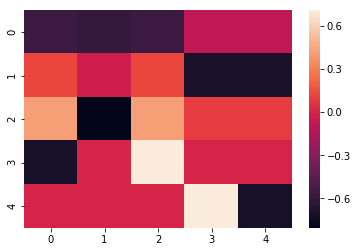

In [53]:
sns.heatmap(V)

Text(0,0.5,'Variance')

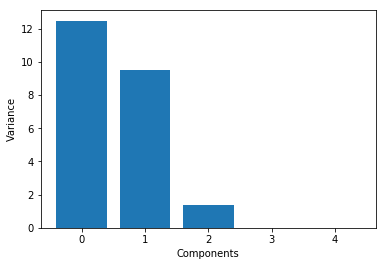

In [54]:
plt.bar(np.arange(5),S)
plt.xlabel('Components')
plt.ylabel('Variance')

Reconstructing the matrix from the factors

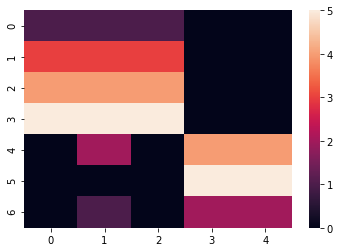

In [55]:
sns.heatmap(np.matmul(np.matmul(U,np.diag(S)), V))

### 7. Linear Discriminant Analysis

Steps involved in LDA
1. Input data: set of points in $R^d$
2. Compute mean vectors $\mu_1$ and $\mu_2$
3. Compute between class scatter matrix $S_B$
4. Compute within class scatter matrix $S_W$
5. Compute the matrix $S_W^{-1}S_B$
4. Compute the first eigenvector ($v_1$) of the matrix $S_W^{-1}S_B$
5. Project data on to this eigenvector $Xv_1$

In [56]:
X = iris_df.values[:,0:4]
y = iris_df.values[:,4] 

In [57]:
X = X[0:100,:]

In [58]:
y = y[0:100]

In [59]:
np.shape(X)

(100, 4)

In [60]:
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

Project data points to maximize discrimination between the two classes

In [61]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_r1 = lda.fit(X, y).transform(X)

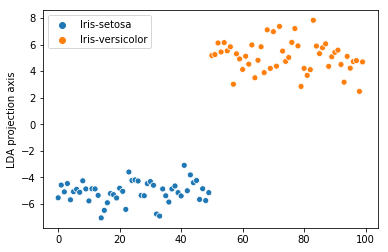

In [63]:
fig = sns.scatterplot(x=np.arange(np.size(X_r1)),y=X_r1[:,0],hue=y)
plt.ylabel('LDA projection axis')
plt.show(fig)

Project data points on to the principal components

In [64]:
pca = PCA(n_components=2)
X_r2 = pca.fit(X).transform(X)

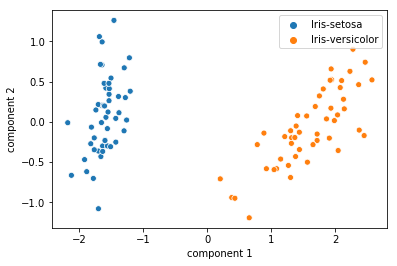

In [65]:
fig=sns.scatterplot(x=X_r2[:,0],y=X_r2[:,1],hue=y)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.show(fig)
